In [1]:
import argparse
import io
import os
from PIL import Image
import torch

In [2]:
 model = torch.hub.load('C:/Users/so14085/yolov5', 'custom', path='C:/Users/so14085/yolov5/runs/train/exp5/weights/best.pt', source='local',force_reload=True)

YOLOv5  v6.1-369-g030586a Python-3.9.12 torch-1.9.1+cu102 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [3]:
# Inference
img1 = Image.open('C:/Users/so14085/yolov5/test1/test/images/2_jpg.rf.d76f3637897d6bfe1e02c26831252b49.jpg') 

In [4]:
img1.show()

In [4]:
results = model(img1, size=640)  # includes NMS

In [5]:
results.show()

## run this code only

In [2]:
import argparse
import io
import os
from PIL import Image
import json
import torch
import glob
from flask import Flask, render_template, request, redirect, send_file
import numpy as np
from numpy import asarray
import cv2
import random
from PIL import Image as im




def get_Center_point_on_imageFrame(json_object,img):
    numpyImg = asarray(img)
    for obj in range(len(json_object)):
        x = json_object[obj]['xmax']- (json_object[obj]['xmax']-json_object[obj]['xmin'])/2
        y = json_object[obj]['ymax']- (json_object[obj]['ymax']-json_object[obj]['ymin'])/2

        randomColour=random.randrange(100,255)
        numpyImg = cv2.circle(numpyImg,(int(x),int(y)), 3, (randomColour), -1)
        cv2.putText(numpyImg, json_object[obj]['name'], (int(x-10), int(y-10)), cv2.FONT_HERSHEY_DUPLEX,0.5, (0, 240, 0), 1, cv2.LINE_AA)
    img = im.fromarray(numpyImg)
    return img




# using torch.hub.load to get custom mode of yolov 5
model = torch.hub.load('C:/Users/so14085/yolov5', 'custom', path='C:/Users/so14085/yolov5/runs/train/exp5/weights/best.pt', source='local',force_reload=True)

# get path of static/images
images_folder = os.path.join('static', 'images')
    
# initialize file_name
file_name =0




app = Flask(__name__)
app.config['UPLOAD_FOLDER'] = images_folder
@app.route("/", methods=["GET","POST"])    

def home():

    if request.method == "POST":
        #receive picture to detect obj using model
        img_bytes = request.files['file'].read()
        img = Image.open(io.BytesIO(img_bytes))
        results =model(img, size=640) 
        
        # get json of label picture
        data = results.pandas().xyxy[0].to_json(orient="records")
        json_object = json.loads(data)
        print(json_object)  
        
        # get object_names from json
        obj_detect=[]
        for obj in json_object:
            obj_detect.append(obj['name'])
        # classify room type
        allobj_toilet=['Toilet','Bathtub','Exhaust Fan', 'Toilet Sink', 'Water Heater' ,'Washing Machine' ,'Water Cubicle', 'Thermo Ventilator' ,'Faucet']
        allobj_kitchen = ['Microwave','Cupboard','Oven','Exhaust Hood','Stove','Dish Washer','Sink',"Washing Machine",'Fridge','Faucet','Exhaust Fan']
        
        
        check_kitchen= filter(lambda a : a in obj_detect, allobj_kitchen)
        check_toilet= filter(lambda a : a in obj_detect, allobj_toilet)

        list_check_kitchen=list(check_kitchen)
        list_check_toilet=list(check_toilet)


        if len(list_check_kitchen)> len(list_check_toilet) :
            typ_of_room="Kitchen"
        else:
            typ_of_room="Toilet"
            
            
        # set name of result
        results = results.render()
        path='C:/Users/so14085/yolov5-flask-master/yolov5-flask-master/static/images'
        os.chdir(path)
        my_files = glob.glob('*.jpg')
        global file_name
        while str(file_name)  in str(my_files)   : 
            file_name=file_name+1    
            
        # save  result of model     
        path='C:/Users/so14085/yolov5-flask-master/yolov5-flask-master'
        os.chdir(path)
        img_base64 = get_Center_point_on_imageFrame(json_object,img)
        for img in results:
            img_base64.save("static/images/"+str(file_name)+".jpg", format="JPEG")
        print(file_name)    
        
    
        full_filename = os.path.join(app.config['UPLOAD_FOLDER'], str(file_name)+'.jpg')
        return render_template("image.html",file_name=full_filename,obj_name =obj_detect,typ_of_room=typ_of_room)
        
    return render_template("index.html")



if __name__ == "__main__":
    app.run(host='127.0.0.1', port=7000)




FileNotFoundError: [Errno 2] No such file or directory: './yolov5-flask-master\\hubconf.py'

In [6]:
import argparse
import io
import os
from PIL import Image
import json
import torch
import random
import glob
import numpy as np
import cv2
from flask import Flask, render_template, request, redirect, send_file

from functools import reduce

path='C:/Users/so14085/yolov5/test1/test/images/'
os.chdir(path)
imgs = glob.glob('*.jpg')

# using torch.hub.load to get custom mode of yolov 5
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/yolov5/runs/train/exp5/weights/best.pt', source='local',force_reload=True)
img1 = Image.open('C:/Users/so14085/yolov5/test1/test/images/78_jpg.rf.e7386bd7af26198a434c1efe27f8277e.jpg')
results = model(img1, size=640) 
Get_json_data = results.pandas().xyxy[0].to_json(orient="records")
json_object = json.loads(Get_json_data)
obj_detect=[]
for obj in json_object:
    obj_detect.append(obj['name'])
allobj_toilet=['Toilet','Bathtub','Exhaust Fan', 'Toilet Sink', 'Water Heater' ,'Washing Machine' ,'Water Cubicle', 'Thermo Ventilator' ,'Faucet']
allobj_kitchen = ['Microwave','Cupboard','Oven','Exhaust Hood','Stove','Dish Washer','Sink',"Washing Machine",'Fridge','Faucet','Exhaust Fan']
       
check_kitchen= filter(lambda a : a in obj_detect, allobj_kitchen)
check_toilet= filter(lambda a : a in obj_detect, allobj_toilet)

list_check_kitchen=list(check_kitchen)
list_check_toilet=list(check_toilet)


if len(list_check_kitchen)> len(list_check_toilet) :
    typ_of_room="Kitchen"
else:
    typ_of_room="Toilet"


FileNotFoundError: [Errno 2] No such file or directory: 'ultralytics/yolov5\\hubconf.py'

## classification text

In [26]:
import pandas as pd
for i in imgs:
    image= Image.open(path+str(i))
    results = model(image, size=640) 
    Get_json_data = results.pandas().xyxy[0].to_json(orient="records")
    json_object = json.loads(Get_json_data)
    obj_detect=[]
    for obj in json_object:
        obj_detect.append(obj['name'])
    allobj_toilet=['Toilet','Bathtub','Exhaust Fan', 'Toilet Sink', 'Water Heater' ,'Washing Machine' ,'Water Cubicle', 'Thermo Ventilator' ,'Faucet']
    allobj_kitchen = ['Microwave','Cupboard','Oven','Exhaust Hood','Stove','Dish Washer','Sink',"Washing Machine",'Fridge','Faucet','Exhaust Fan']

    check_kitchen= filter(lambda a : a in obj_detect, allobj_kitchen)
    check_toilet= filter(lambda a : a in obj_detect, allobj_toilet)

    list_check_kitchen=list(check_kitchen)
    list_check_toilet=list(check_toilet)


    if len(list_check_kitchen)> len(list_check_toilet) :
        typ_of_room="Kitchen"
    else:
        typ_of_room="Toilet"
    print(typ_of_room,obj_detect)

Kitchen <built-in method sort of list object at 0x00000267639B74C0>
Kitchen <built-in method sort of list object at 0x0000026762D3D380>
Kitchen <built-in method sort of list object at 0x0000026763CEDC80>
Kitchen <built-in method sort of list object at 0x0000026762D3A940>
Kitchen <built-in method sort of list object at 0x0000026763CB6640>
Kitchen <built-in method sort of list object at 0x0000026763CEF900>
Toilet <built-in method sort of list object at 0x0000026763A01540>
Toilet <built-in method sort of list object at 0x0000026763A01C80>
Toilet <built-in method sort of list object at 0x0000026763A01A40>
Toilet <built-in method sort of list object at 0x0000026763A01A80>
Kitchen <built-in method sort of list object at 0x0000026763A01040>
Toilet <built-in method sort of list object at 0x0000026763D69E40>
Kitchen <built-in method sort of list object at 0x0000026763A017C0>
Toilet <built-in method sort of list object at 0x0000026763A015C0>
Kitchen <built-in method sort of list object at 0x0000

In [37]:
import csv
csv_file = "C:/Users/so14085/yolov5/Names.csv"
with open(csv_file, 'w',newline='') as csvfile:
    writer = csv.DictWriter(csvfile)


    writer.writerows(obj_detect)

TypeError: __init__() missing 1 required positional argument: 'fieldnames'

In [31]:
import numpy as np
from numpy import asarray
import csv
json_object
import random
from PIL import Image as im
def get_Center_point_on_imageFrame(json_object,img,obj):

    numpyImg = asarray(img)
    for obj in range(len(json_object)):
        x = json_object[obj]['xmax']- (json_object[obj]['xmax']-json_object[obj]['xmin'])/2
        y = json_object[obj]['ymax']- (json_object[obj]['ymax']-json_object[obj]['ymin'])/2

        randomColour=random.randrange(100,255)
        numpyImg = cv2.circle(numpyImg,(int(x),int(y)), 5, (randomColour), -1)
        cv2.putText(numpyImg, json_object[obj]['name'], (int(x-10), int(y-10)), cv2.FONT_HERSHEY_DUPLEX,0.5, (0, 255, 255), 1, cv2.LINE_AA)
    img = im.fromarray(numpyImg)
    return img

In [42]:

get_Center_point_on_imageFrame(json_object,img1,obj)

In [38]:
json_object[0]['xmin']
type(json_object[0]['xmax'])

float

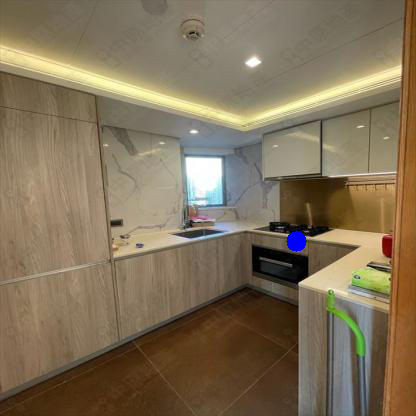

In [105]:
img

## classification 

In [92]:
import csv
import argparse
import io
import os
from PIL import Image
import json
import torch
import random
import glob
import cv2
from flask import Flask, render_template, request, redirect, send_file
import functools 
# using torch.hub.load to get custom mode of yolov 5
model = torch.hub.load('C:/Users/so14085/yolov5', 'custom', path='C:/Users/so14085/yolov5/runs/train/exp5/weights/best.pt', source='local',force_reload=True)
csv_file = "C:/Users/so14085/yolov5/Names.csv"
path='C:/Users/so14085/yolov5/test1/test/images/'
os.chdir(path)
imgs = glob.glob('*.jpg')
id_room=1
for i in imgs:
    image= Image.open(path+str(i))
    results = model(image, size=640) 
    Get_json_data = results.pandas().xyxy[0].to_json(orient="records")
    json_object += json.loads(Get_json_data)
    with open(csv_file, 'w',newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=['id','xmin', 'ymax', 'confidence', 'xmax', 'ymin', 'class', 'name'])
        writer.writeheader()
        global id_room
        for id_ in json_object:
            print(id_room)
        writer.writerows(json_object)
         
        id_room=id_room+1
        

YOLOv5  v6.1-369-g030586a Python-3.9.12 torch-1.9.1+cu102 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
3

52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
5

69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
7

81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
8

92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
9

103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103


111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112


In [32]:
type(json_object[0])

dict

In [51]:
import csv
csv.reader(csv_file)

In [93]:
path='C:/Users/so14085/yolov5/test1/test/images/'
os.chdir(path)
imgs = glob.glob('*.jpg')

In [94]:
imgs

['105_jpg.rf.2666ef5113aef4cefb8948210248667c.jpg',
 '106_jpg.rf.275a7297f108cd713db2cf15a4d22fd3.jpg',
 '129_jpg.rf.63c4ed98655bba9bfda1ae72c9f1195a.jpg',
 '136_jpg.rf.39b5e6f522b649285bcaa7fa01564c63.jpg',
 '167_jpg.rf.5d28e1ca0b2869296d792ba94f552abb.jpg',
 '168_jpg.rf.7eb978dbdbafef07b35bc28b915ebb73.jpg',
 '169_jpg.rf.5e72ef3e4f3171edef765ebf597a1b21.jpg',
 '170_jpg.rf.8aca0499c5ddb0fb4dd4f1edae792960.jpg',
 '179_jpg.rf.1bc68beed2815f49132d26de4de46cfd.jpg',
 '183_jpg.rf.54c383a859dd83bc32b29313967c1e02.jpg',
 '184_jpg.rf.8e881c253ee4c1a2211ef8990c633bba.jpg',
 '189_jpg.rf.22487bd5e25d75ad54b1a49472d78b2a.jpg',
 '2_jpg.rf.d76f3637897d6bfe1e02c26831252b49.jpg',
 '35_jpg.rf.66bcf95f8adfe7cf7010e28cb2630753.jpg',
 '45_jpg.rf.7c81c7944d1390c06ec43b74dab1a87f.jpg',
 '48_jpg.rf.4d1f4b1b2c18116667dc044c6e0d1679.jpg',
 '51_jpg.rf.4d61303f4f8ee3e107a54150f97c6ed0.jpg',
 '70_jpg.rf.e74f4f8d42890f026d134293a9de122a.jpg',
 '72_jpg.rf.76d1928ccb9164c9e57c0cf529fca73d.jpg',
 '78_jpg.rf.e7386bd7